In [5]:
# Proyecto 1: Predicción de Pasajeros de Aerolíneas usando LSTM (Mejorado)

# 1. Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Carga del dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Visualización rápida
#data.head()

# 3. Preprocesamiento
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Passengers']])

# Función para crear ventanas de tiempo
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X, y = create_dataset(scaled_data, look_back)

# Reshape de entrada para LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# División en entrenamiento y prueba
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 4. Construcción del modelo
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# 5. Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 6. Evaluación del modelo (corregida)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización de las predicciones
train_predict_inv = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Cálculo de métricas
train_score_mse = mean_squared_error(y_train_inv, train_predict_inv)
test_score_mse = mean_squared_error(y_test_inv, test_predict_inv)

train_score_mae = mean_absolute_error(y_train_inv, train_predict_inv)
test_score_mae = mean_absolute_error(y_test_inv, test_predict_inv)

train_score_r2 = r2_score(y_train_inv, train_predict_inv)
test_score_r2 = r2_score(y_test_inv, test_predict_inv)

print(f'Train Score (MSE): {train_score_mse:.2f}')
print(f'Test Score (MSE): {test_score_mse:.2f}')
print(f'Train Score (MAE): {train_score_mae:.2f}')
print(f'Test Score (MAE): {test_score_mae:.2f}')
print(f'Train R2: {train_score_r2:.4f}')
print(f'Test R2: {test_score_r2:.4f}')

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0760 - val_loss: 0.0420
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - val_loss: 0.0290
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0131 - val_loss: 0.0396
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0103 - val_loss: 0.0340
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0099 - val_loss: 0.0258
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0084 - val_loss: 0.0257
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0084 - val_loss: 0.0263
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - val_loss: 0.0257
Epoch 9/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0083 - val_loss: 0.0261
Epoch 10/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0076 - val_loss: 0.0257
Epoch 11/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0077 - val_loss: 0.0266
Epoch 12/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0072 - val_loss: 0.0260
E

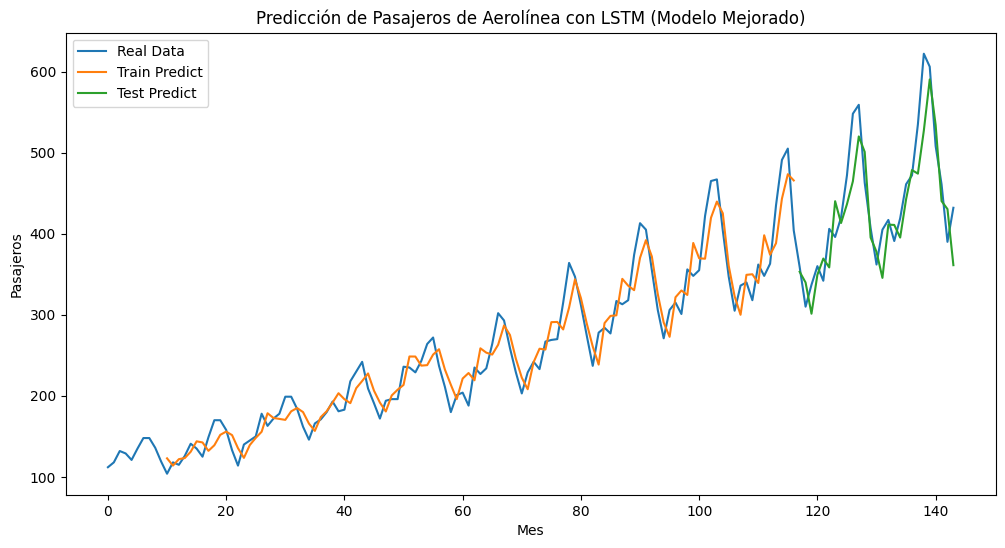

In [6]:
# 7. Visualización
# Preparar datos para graficar (corregido)
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_inv)+look_back, 0] = train_predict_inv[:, 0]

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
start_test = len(train_predict_inv) + look_back
end_test = start_test + len(test_predict_inv)
test_predict_plot[start_test:end_test, 0] = test_predict_inv[:, 0]

# Gráfica
plt.figure(figsize=(12,6))
plt.plot(data['Passengers'].values, label='Real Data')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title('Predicción de Pasajeros de Aerolínea con LSTM')
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

# 8. Conclusiones (comentarios para agregar después)
# Al aumentar el look_back y las unidades de la LSTM, se espera capturar mejor las tendencias
# temporales. Se monitorean métricas MSE, MAE y R2 para evaluar la mejora.